# Get the data

In [2]:
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web

import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the data from web api or csv file (limit: 5 api call per minute or 500 per day)
from_api = False
from_csv = True

stocks = ['AC.TO', 'SHOP.TO', 'AAV.TO', 'ABX.TO', 'ABST.TO']

if from_api == True:
    # 500 days
    start = datetime(2019, 6, 22)
    end = datetime(2021, 6, 18)

    stocks_df = web.DataReader(stocks[0], "av-daily", start=start,
                                end=end, 
                                api_key='V8VXTD0873VH147K')

    for stock in stocks:
        stock_df = web.DataReader(stock, "av-daily", start=start,
                            end=end, 
                            api_key='V8VXTD0873VH147K')
        stocks_df = pd.concat([stocks_df, stock_df], axis=1)

        stocks_df.to_csv('./datasets/can_ohlc_data.csv', index=False)

if from_csv == True:
    stocks_df = pd.read_csv('./datasets/can_ohlc_data.csv')

In [4]:
stocks_df

,open,high,low,close,volume,open.1,high.1,low.1,close.1,volume.1,...,open.3,high.3,low.3,close.3,volume.3,open.4,high.4,low.4,close.4,volume.4
0,39.96,40.87,39.62,40.17,572063,427.8100,428.310,410.3000,410.70,319409,...,20.73,21.45,20.68,21.41,7158853,7.94,8.04,7.91,7.91,86595
1,40.16,40.16,39.44,39.50,744012,402.9000,407.310,371.4000,373.79,456363,...,21.49,21.67,20.77,21.08,9620807,7.90,7.96,7.89,7.95,98360
2,39.52,39.81,39.20,39.36,751978,380.0000,388.470,370.4500,379.45,322235,...,20.09,20.97,20.06,20.81,6143926,7.95,7.96,7.89,7.90,88267
3,39.86,41.44,39.75,40.60,1263508,379.4600,396.260,379.4500,394.66,282707,...,20.48,20.64,20.13,20.59,5268701,7.89,7.91,7.84,7.85,52693
4,40.53,40.58,39.60,39.69,841096,397.7200,398.290,383.0900,393.58,261256,...,20.61,20.74,20.43,20.67,5007879,7.86,8.00,7.86,7.98,116210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,28.70,28.76,28.10,28.34,3515800,1517.9500,1591.000,1516.2200,1585.83,153600,...,27.75,28.24,27.56,28.11,2323900,16.78,17.32,16.78,17.18,324500
496,28.37,28.61,28.13,28.25,2768100,1597.5500,1641.980,1567.4399,1612.11,164300,...,28.17,28.20,27.75,27.76,2523700,17.22,17.70,17.18,17.37,146500
497,28.24,28.32,27.66,28.10,2449100,1616.4900,1685.000,1609.1899,1670.47,205600,...,27.82,28.18,27.47,27.53,3544600,17.50,17.66,17.32,17.36,87800
498,28.08,28.39,27.80,28.05,2135400,1671.0000,1804.715,1666.9800,1790.01,246400,...,26.85,26.90,25.94,25.97,6909000,17.28,17.55,17.28,17.50,174600


In [5]:
# Select high, low and volume columns to drop
drop_columns_lists = [[5*k+1, 5*k+2, 5*k+4] for k in range(len(stocks))]

In [6]:
# merge list of lists into one list
drop_columns = [j for i in drop_columns_lists for j in i]

In [7]:
stocks_df.drop(stocks_df.iloc[:, drop_columns], axis=1, inplace=True)

In [8]:
stocks_df

,open,close,open.1,close.1,open.2,close.2,open.3,close.3,open.4,close.4
0,39.96,40.17,427.8100,410.70,1.74,1.65,20.73,21.41,7.94,7.91
1,40.16,39.50,402.9000,373.79,1.64,1.60,21.49,21.08,7.90,7.95
2,39.52,39.36,380.0000,379.45,1.63,1.69,20.09,20.81,7.95,7.90
3,39.86,40.60,379.4600,394.66,1.68,1.60,20.48,20.59,7.89,7.85
4,40.53,39.69,397.7200,393.58,1.61,1.63,20.61,20.67,7.86,7.98
...,...,...,...,...,...,...,...,...,...,...
495,28.70,28.34,1517.9500,1585.83,4.58,4.38,27.75,28.11,16.78,17.18
496,28.37,28.25,1597.5500,1612.11,4.41,4.48,28.17,27.76,17.22,17.37
497,28.24,28.10,1616.4900,1670.47,4.45,4.47,27.82,27.53,17.50,17.36
498,28.08,28.05,1671.0000,1790.01,4.48,4.26,26.85,25.97,17.28,17.50


In [9]:
# Convert to O and C format
df_adj_list_all = []
for k in range(len(stocks)):
    # make a dictionary of open and close values for all columns
    df_adj_list=[{'O'+str(i+1):stocks_df.iloc[i, 2*k], 'C'+str(i+1):stocks_df.iloc[i, 2*k+1]} for i in range(len(stocks_df))]
    # merge dictionaries into single one
    df_adj_dict = {k: v for d in df_adj_list for k, v in d.items()}
    # append the dictionary to the list of all stocks
    df_adj_list_all.append(df_adj_dict)

In [10]:
# df_adj_list_all

In [11]:
df_OC = pd.DataFrame(df_adj_list_all)

In [12]:
df_OC

,O1,C1,O2,C2,O3,C3,O4,C4,O5,C5,...,O496,C496,O497,C497,O498,C498,O499,C499,O500,C500
0,39.96,40.17,40.16,39.50,39.52,39.36,39.86,40.60,40.53,39.69,...,28.70,28.34,28.37,28.25,28.24,28.10,28.08,28.05,27.8200,27.76
1,427.81,410.70,402.90,373.79,380.00,379.45,379.46,394.66,397.72,393.58,...,1517.95,1585.83,1597.55,1612.11,1616.49,1670.47,1671.00,1790.01,1785.5699,1820.37
2,1.74,1.65,1.64,1.60,1.63,1.69,1.68,1.60,1.61,1.63,...,4.58,4.38,4.41,4.48,4.45,4.47,4.48,4.26,4.1900,4.25
3,20.73,21.41,21.49,21.08,20.09,20.81,20.48,20.59,20.61,20.67,...,27.75,28.11,28.17,27.76,27.82,27.53,26.85,25.97,26.1500,25.79
4,7.94,7.91,7.90,7.95,7.95,7.90,7.89,7.85,7.86,7.98,...,16.78,17.18,17.22,17.37,17.50,17.36,17.28,17.50,17.3400,17.61


In [13]:
# Is the NaN values in any rows?
df_OC.isnull().any(axis=1)

0    False
1    False
2    False
3    False
4    False
dtype: bool

# Exploretory Data Analysis

<AxesSubplot:>

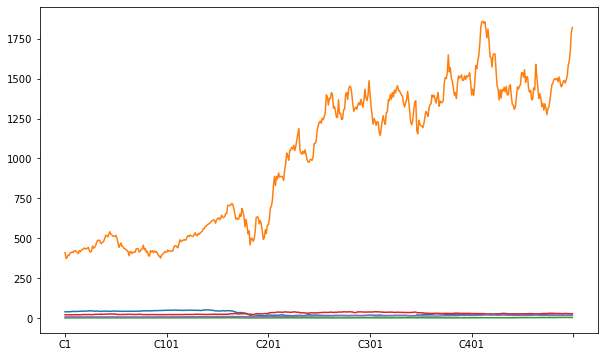

In [14]:
# we use regular expression to select Close columns in data
data_cols = df_OC.columns
r = re.compile("^C")
close_cols = filter(r.match, data_cols)

df_OC[close_cols].T.plot(figsize=(10,6), legend=False)

In [15]:
memory_days = 10
num_cols = 2 # open and close columns
start_day = 1
last_day = 440 # from start_day to last_day, make 10 day windows. So 450 days for training and 55 days for backtesting
X_windows = [0] # X_windows are stored as days starts at day=1 (workaround)


# scale a dataframe so the first column (opening price) is 1.0. Divide from the last to the first column.
def scaler(df):
    for column in reversed(df.columns):
        df.loc[:, column] = df.loc[:, column] / df.iloc[:,0]
    return df

for day in range(start_day, last_day+1):
    # select the 10 day window
    rolling_window = df_OC.iloc[:, day*num_cols-num_cols:(day+memory_days)*num_cols-num_cols]
    # scale data to 'O1' column
    rolling_window_scaled = scaler(rolling_window.copy())
    X_windows.append(rolling_window_scaled)
    # set equal column names for all dataframe to concatenate
    X_windows[day].columns = X_windows[start_day].columns

# concatenate all 10 day windows in one dataframe
X_windows_list = [X_windows[day] for day in range(start_day, last_day+1)]    
X_windows_con = pd.concat(X_windows_list) 

In [16]:
# Split the data into train, test and backtest data. The train data is used in machine learning to fit the model and the test data is to ckeck the model on one signle 10 day window.
# The backtest data is used to check the strategy by using the prediction of the model.
n_stocks = 5
train_data = X_windows_con.iloc[:(last_day-1)*n_stocks, :]
test_data = X_windows_con.iloc[(last_day-1)*n_stocks:, :]
backtest_data = df_OC.iloc[:, num_cols*(last_day+memory_days):]

In [36]:
train_data

,O1,C1,O2,C2,O3,C3,O4,C4,O5,C5,O6,C6,O7,C7,O8,C8,O9,C9,O10,C10
0,1.0,1.005255,1.005005,0.988488,0.988989,0.984985,0.997497,1.016016,1.014264,0.993243,0.995245,1.016016,1.016016,1.027528,1.027528,1.048298,1.045045,1.044294,1.042292,1.038288
1,1.0,0.960006,0.941773,0.873729,0.888245,0.886959,0.886983,0.922512,0.929665,0.919988,0.933148,0.956499,0.955167,0.959187,0.960730,0.967813,0.954466,0.959748,0.957902,0.985180
2,1.0,0.948276,0.942529,0.919540,0.936782,0.971264,0.965517,0.919540,0.925287,0.936782,0.925287,0.867816,0.873563,0.850575,0.873563,0.867816,0.873563,0.896552,0.890805,0.908046
3,1.0,1.032803,1.036662,1.016884,0.969127,1.003859,0.987940,0.993247,0.994211,0.997106,0.961409,0.987458,0.994694,1.009648,0.998553,1.017849,0.984081,0.997106,0.997588,1.001447
4,1.0,0.996222,0.994962,1.001259,1.001259,0.994962,0.993703,0.988665,0.989924,1.005038,1.005038,1.010076,1.010076,1.015113,1.018892,1.016373,1.015113,1.007557,1.005038,1.002519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1.0,0.973208,0.988679,0.998113,0.991698,1.009057,1.020755,1.001132,1.000000,0.987547,0.986415,1.006792,1.004528,0.986792,0.992453,0.998113,0.998868,1.022642,1.026415,1.046792
1,1.0,1.003839,1.013268,0.954927,0.946226,0.918570,0.909532,0.916152,0.923013,0.897747,0.889505,0.909669,0.929194,0.952846,0.988263,0.994568,1.012300,0.985090,0.993613,0.998153
2,1.0,0.960000,0.984000,0.964000,0.956000,0.940000,0.956000,0.960000,0.968000,0.948000,0.936000,0.984000,0.984000,0.948000,1.048000,1.188000,1.236000,1.216000,1.256000,1.216000
3,1.0,0.986439,0.987989,0.980240,0.975203,0.963193,0.957768,0.972491,0.969004,0.982952,0.962805,0.954669,0.959318,0.965905,0.980240,0.990701,1.005424,1.000775,1.015498,1.016660


<AxesSubplot:>

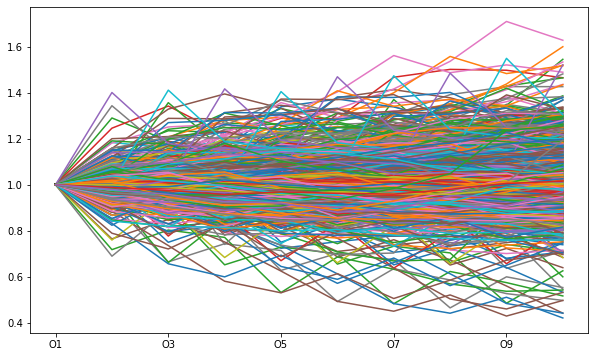

In [38]:
train_data.filter(regex='^O', axis=1).T.plot(figsize=(10,6), legend=False)

<ipython-input-72-2dd1dd20c7e6>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


<AxesSubplot:>

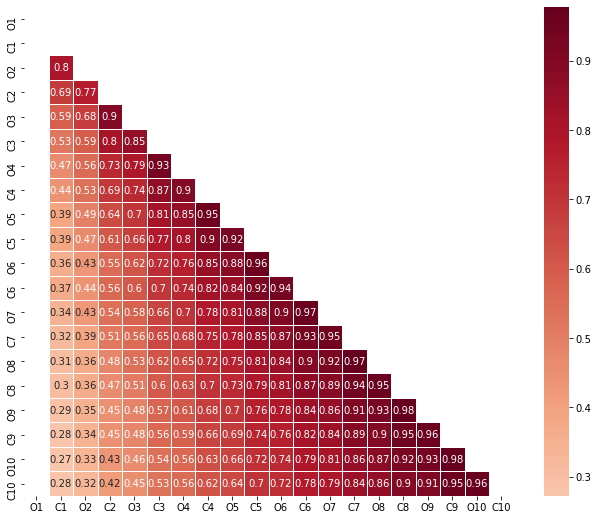

In [72]:
corr_matrix = train_data.corr()

import seaborn as sns
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (11,9))
sns.heatmap(corr_matrix,
            annot=True,
            mask = mask,
            cmap = 'RdBu_r', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)            

In [39]:
test_data

,O1,C1,O2,C2,O3,C3,O4,C4,O5,C5,O6,C6,O7,C7,O8,C8,O9,C9,O10,C10
0,1.0,1.009542,1.003053,1.020611,1.032443,1.012595,1.011450,0.998855,0.997710,1.018321,1.016031,0.998092,1.003817,1.009542,1.010305,1.034351,1.038168,1.058779,1.062977,1.055344
1,1.0,0.942423,0.933835,0.906541,0.897622,0.904155,0.910926,0.885991,0.877858,0.897757,0.917026,0.940369,0.975322,0.981544,0.999044,0.972191,0.980602,0.985082,0.982100,0.990992
2,1.0,0.979675,0.971545,0.955285,0.971545,0.975610,0.983740,0.963415,0.951220,1.000000,1.000000,0.963415,1.065041,1.207317,1.256098,1.235772,1.276423,1.235772,1.231707,1.243902
3,1.0,0.992157,0.987059,0.974902,0.969412,0.984314,0.980784,0.994902,0.974510,0.966275,0.970980,0.977647,0.992157,1.002745,1.017647,1.012941,1.027843,1.029020,1.029412,1.022745
4,1.0,0.983014,0.977534,0.947945,0.946301,0.934247,0.939726,0.904658,0.898630,0.908493,0.911781,0.956164,0.972603,0.960548,0.964932,0.950685,0.951233,0.979178,0.979178,0.972603


In [40]:
backtest_data.head()

,O451,C451,O452,C452,O453,C453,O454,C454,O455,C455,...,O496,C496,O497,C497,O498,C498,O499,C499,O500,C500
0,26.83,26.84,26.65,27.00,28.40,26.88,27.09,26.21,26.30,25.43,...,28.70,28.34,28.37,28.25,28.24,28.10,28.08,28.05,27.8200,27.76
1,1520.81,1537.03,1530.21,1508.52,1526.79,1555.57,1564.00,1476.06,1500.09,1511.78,...,1517.95,1585.83,1597.55,1612.11,1616.49,1670.47,1671.00,1790.01,1785.5699,1820.37
2,2.94,2.93,2.94,3.01,3.01,3.06,3.06,3.20,3.23,3.42,...,4.58,4.38,4.41,4.48,4.45,4.47,4.48,4.26,4.1900,4.25
3,26.33,26.57,26.51,26.35,26.52,26.44,26.41,26.42,26.77,27.56,...,27.75,28.11,28.17,27.76,27.82,27.53,26.85,25.97,26.1500,25.79
4,18.04,18.34,18.30,17.32,17.36,16.82,16.80,16.88,16.91,16.99,...,16.78,17.18,17.22,17.37,17.50,17.36,17.28,17.50,17.3400,17.61


In [41]:
# remove 10th day close column of test data
X_test = test_data.drop(columns = ['C10'])

# set the upward change in price as 1 and the downward as 0
y_test = (test_data.loc[:,'C10'] > test_data.loc[:,'O10']).astype('uint8')

In [42]:
# We set 9 days data to be the predictor of the 10th day
X_train = train_data.drop(columns = ['C10'])

# set the upward change in price as 1 and the downward as 0
y_train = (train_data.loc[:,'C10'] > train_data.loc[:,'O10']).astype('uint8')

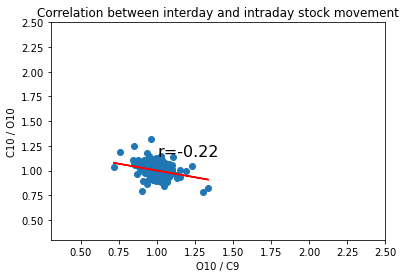

In [43]:
# find the correlation between the interday and intraday stock movement
x = train_data.loc[:,'O10']/train_data.loc[:,'C9']
y = train_data.loc[:,'C10']/train_data.loc[:,'O10']

m, b = np.polyfit(x, y, 1)
r = y.corr(x)
plt.scatter(x, y)
plt.plot(x, m*x+b, '-r')
plt.text(1,1.15, 'r={:.2f}'.format(r), fontsize=16)
plt.xlim((.3,2.5))
plt.ylim((.3,2.5))
plt.xlabel("O10 / C9")
plt.ylabel("C10 / O10")
plt.title("Correlation between interday and intraday stock movement")
plt.savefig('images/correlation_interday_intraday.png')
plt.show()

# Model

In [63]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics,preprocessing
from sklearn.model_selection import cross_val_predict

In [64]:
forest_clf = RandomForestClassifier(random_state=42)
y_predict = cross_val_predict(forest_clf, X_train, y_train, cv=5)
params = forest_clf.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [65]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_predict)

In [66]:
# normalize confusion matrix
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
norm_conf_mx

array([[0.59878155, 0.40121845],
       [0.63957935, 0.36042065]])

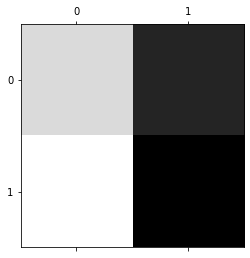

In [67]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [68]:
from sklearn.metrics import f1_score

f1_score(y_train, y_predict)

0.40021231422505305

In [69]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predict on the test set

In [51]:
y_pred = forest_clf.predict(X_test)

In [52]:
conf_mx_test = confusion_matrix(y_test, y_pred)
conf_mx_test

array([[2, 1],
       [2, 0]])

In [53]:
# normalize confusion matrix
row_sums = conf_mx_test.sum(axis=1, keepdims=True)
norm_conf_mx_test = conf_mx_test / row_sums
norm_conf_mx_test

array([[0.66666667, 0.33333333],
       [1.        , 0.        ]])

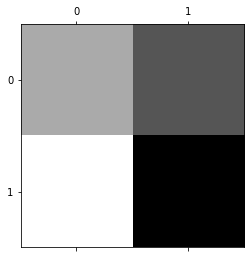

In [54]:
plt.matshow(norm_conf_mx_test, cmap=plt.cm.gray)
plt.show()

In [55]:
f1_score(y_test, y_pred)

0.0

In [56]:
y_pred

array([1, 0, 0, 0, 0], dtype=uint8)

In [57]:
StID = range(1,len(y_pred)+1)
predictions = pd.DataFrame(y_pred, columns=['movement'], index=StID)

In [58]:
predictions

,movement
1,1
2,0
3,0
4,0
5,0


In [59]:
predictions.to_csv('predictions/can_predictions.csv')

# Applying the strategy

In [60]:
from trade_stat_logger.logger import SimpleLogger

logger = SimpleLogger()

backtest_days = np.arange(memory_days, len(backtest_data.columns)/2, 1, dtype=int)

for day in backtest_days:
    # get the close and open of 9 days and the 10th day open
    X_backtest = backtest_data.iloc[:, 2*(day-memory_days):2*day-1]
    
    # predict the 10th close
    y_predict_10 = forest_clf.predict(X_backtest)
    
    # apply the strategy to all tickers in dataset in that specific day
    for index, rows in X_backtest.iterrows():
        share_price_open = backtest_data.iloc[index-1, 2*day-2]
        share_price_close = backtest_data.iloc[index-1, 2*day-1]
        # if the 10th close is higher than open, then buy. if it's lower, do nothing (no short selling for now)
        if y_predict_10[index-1] == 1:
            logger.log(security = index, shares = 1, share_price = share_price_open)
            logger.log(security = index, shares = -1, share_price = share_price_close)

In [62]:
# Analyze the performance of the strategy
logger.graph_statistics(show_window=False)
plt.savefig('./images/can_graph_statistics.png')

ZeroDivisionError: division by zero